In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import re

C:\Users\aakas\AppData\Local\Temp\ipykernel_9808\1042166343.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [33]:
dataFrame = pd.read_csv('D:\Assesment_2\data\instagram_reach.csv',index_col=['S.No'])
dataFrame.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 25
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.5+ KB


In [34]:
dataFrame.sample(5)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
11,databowl,Today we are featured in The Future CMO Magazi...,149,#artificialintelligence #futurism#machinelearn...,7 hours,31
14,magnodc,Acción es la mejor arma 🌏🏰,2014,#moneymaker #startup #entrepreneurlife#entrepr...,2 hours,29
13,ah_studio_,Hatsu Veggie Milk 🎯 Ref 02. Piece O1 - 03,888,#hatsu #hatsulovers #design #artdirection#setd...,2 hours,43
9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
11,hollympeck,Still on set. 🙃 Can't tell you what it's for!,273,#artificialintelligence,2 hours,41


In [35]:
# removing hours and typecasting to int
dataFrame['Time since posted'] = dataFrame['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [36]:
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sb.regplot(data = dataFrame, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

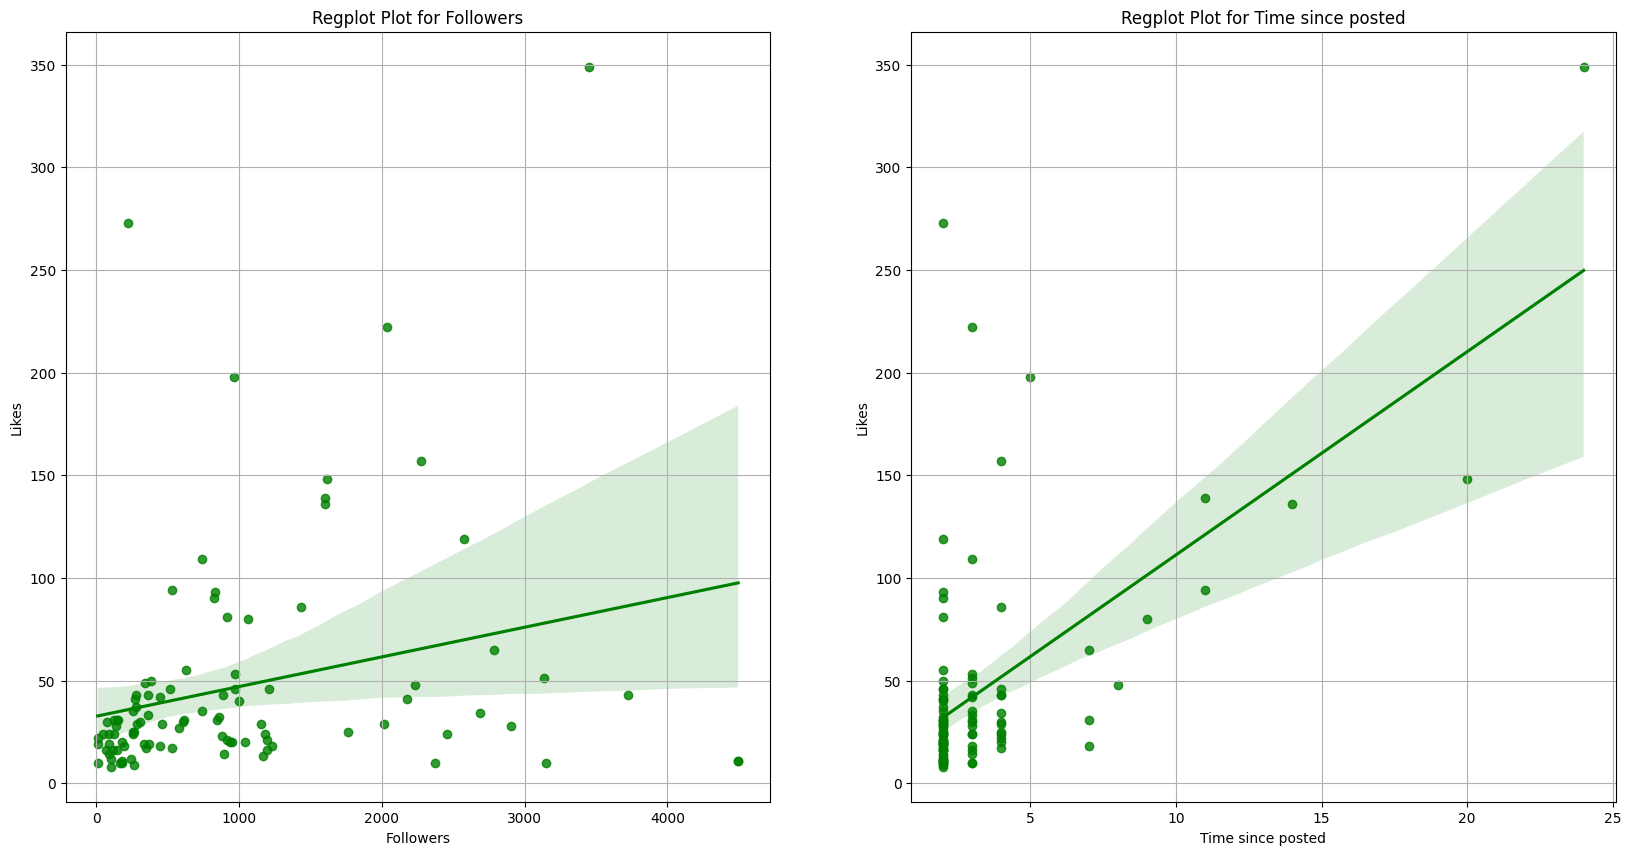

In [37]:
PlotDataGiveConclusion2(['Followers', 'Time since posted'])

Max value of target is 349.0


In [39]:
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [40]:
def preprocess(q):
    
    q = str(q).lower().strip()
    

    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    

    q = q.replace('[math]', '')
    

    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
 
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [41]:
dataFrame.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [42]:
dataFrame['Caption'] =dataFrame['Caption'].apply(preprocess)
dataFrame['Hashtags'] = dataFrame['Hashtags'].apply(preprocess)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
corpus = list(dataFrame['Caption'])
cv = CountVectorizer(max_features=500)
q1_arr =(cv.fit_transform(corpus).toarray())
temp_df1= pd.DataFrame(q1_arr,index = dataFrame.index)
dataFrame.drop(columns=['Caption'],inplace=True)
temp_df = pd.concat([dataFrame,temp_df1],axis = 1)


In [45]:
temp_df

,USERNAME,Followers,Hashtags,Time since posted,Likes,0,1,2,3,4,...,490,491,492,493,494,495,496,497,498,499
S.No,,,,,,,,,,,,,,,,,,,,,
1,mikequindazzi,1600,machinelearning ai dataanalytics datascienc...,11,139,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,drgorillapaints,880,deck mac macintosh sayhello apple stevejo...,2,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,aitrading_official,255,whoiswho aitrading ai aitradingteam instate...,2,25,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
4,opensourcedworkplace,340,iot cre workplace cdo bigdata technology t...,3,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,crea.vision,304,instamachinelearning instabigdata instamarket...,3,30,0,0,0,0,1,...,0,0,0,0,0,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,michaelgarza__,614,beverlyhills realestate losangelesrealestate ...,3,31,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,dvlp_search,450,workspace work developer development develo...,3,42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,ecom.space,182,books book motivation inspiration life boo...,3,10,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,0


In [46]:
dataFrame = temp_df
featureVector = np.array(dataFrame[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(dataFrame['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)
stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [50]:
model = RandomForestRegressor()
model.fit(xTrain, yTrain)

RandomForestRegressor()

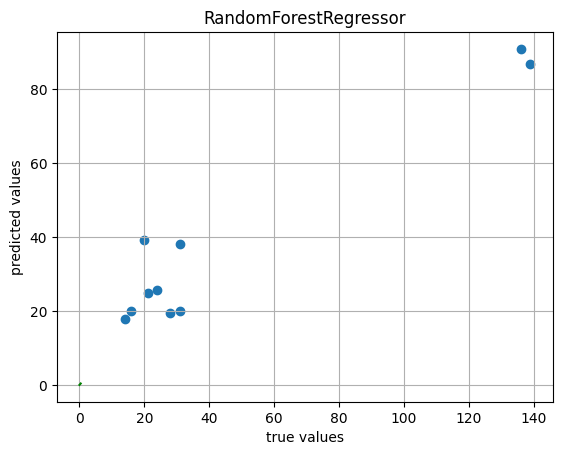

In [51]:
predictions = model.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('RandomForestRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [52]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

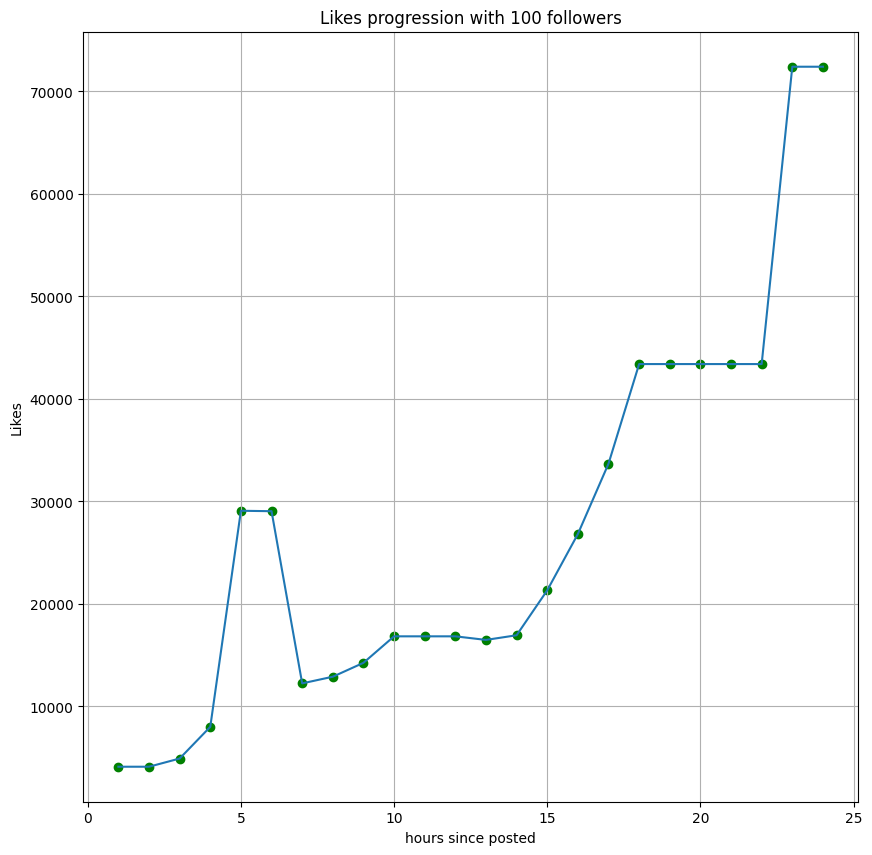

In [53]:
PredictionsWithConstantFollowers(model, 100, stdSc, maxValLikes)

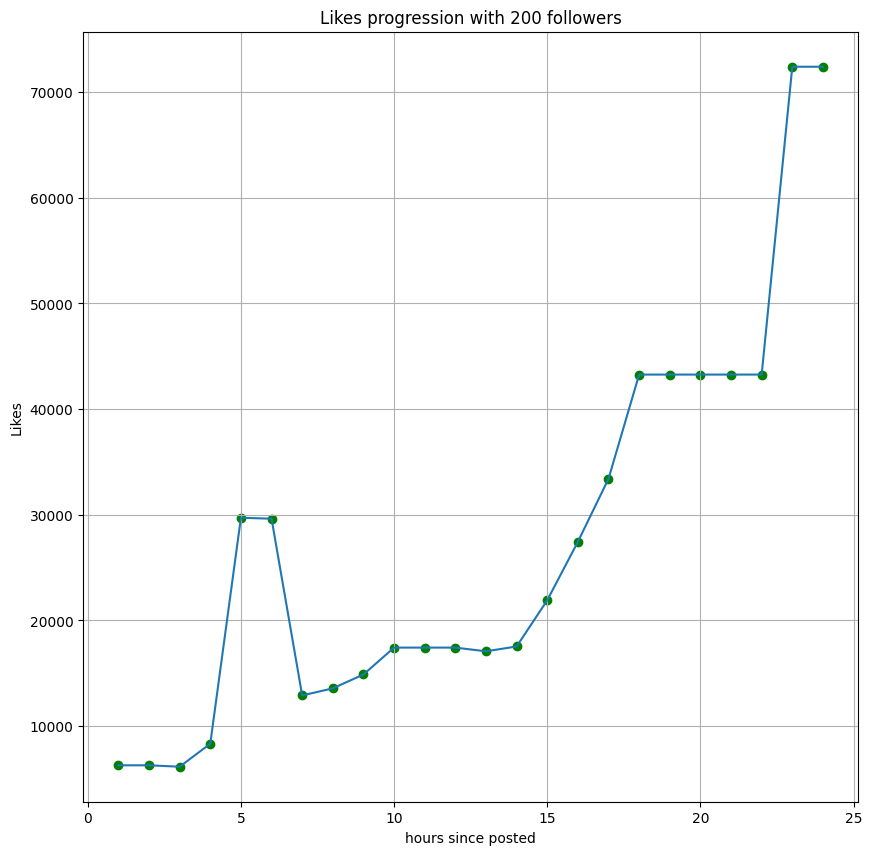

In [55]:
PredictionsWithConstantFollowers(model, 200, stdSc, maxValLikes)

In [56]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

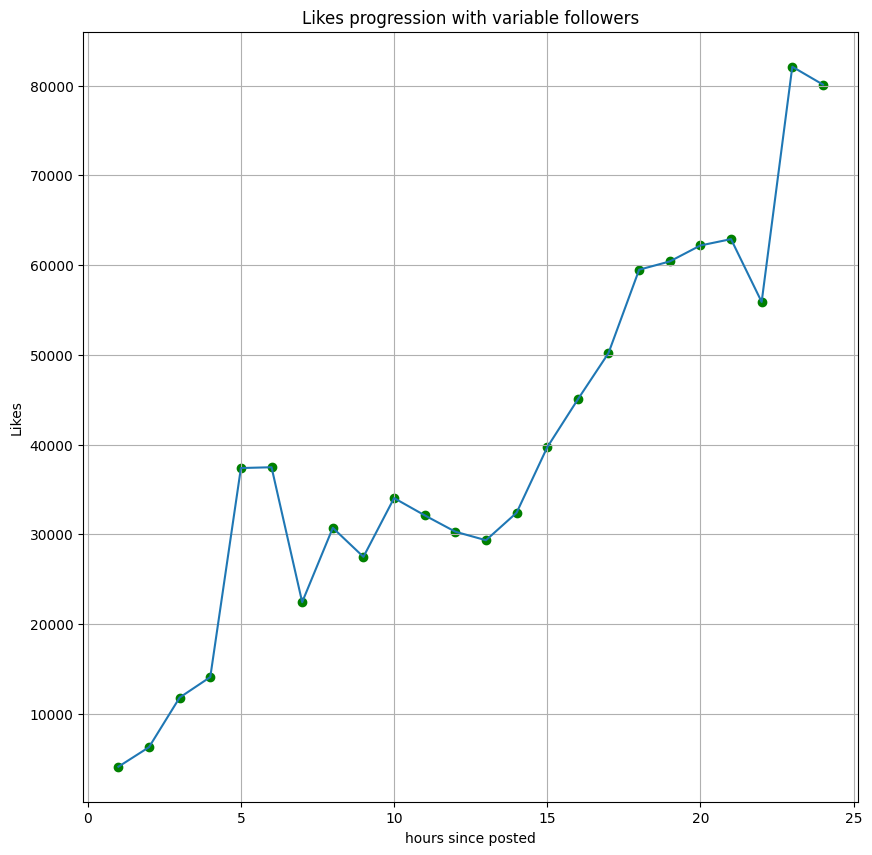

In [58]:
PredictionsWithVariableFollowers(model, 1000, stdSc, maxValLikes)